<a href="https://colab.research.google.com/github/aigerim1q/Assignment-BT2/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорт библиотек и загрузка данных Airbn**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
print("Выберите CSV файл с датасетом Airbnb:")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print("Файл загружен:", file_name)
df.head()


Выберите CSV файл с датасетом Airbnb:


Saving Airbnb_Data.csv to Airbnb_Data (1).csv
Файл загружен: Airbnb_Data (1).csv


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


# Предобработка данных

In [ ]:
target_col = 'instant_bookable'

print("=== INFO до очистки ===")
display(df.info())
print("\n=== Описание числовых столбцов до очистки ===")
display(df.describe(include='all').T.head(10))
print("\n=== Несколько строк (до очистки) ===")
display(df.sample(5, random_state=42))

=== INFO до очистки ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_

None


=== Описание числовых столбцов до очистки ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,74111.0,NaN,NaN,NaN,11266617.102468,6081734.886894,344.0,6261964.5,12254147.0,16402260.5,21230903.0
log_price,74111.0,NaN,NaN,NaN,4.782069,0.717394,0.0,4.317488,4.70953,5.220356,7.600402
property_type,74111,35,Apartment,49003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type,74111,3,Entire home/apt,41310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amenities,74111,67122,{},586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74111.0,NaN,NaN,NaN,3.155146,2.153589,1.0,2.0,2.0,4.0,16.0
bathrooms,73911.0,NaN,NaN,NaN,1.235263,0.582044,0.0,1.0,1.0,1.0,8.0
bed_type,74111,5,Real Bed,72028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cancellation_policy,74111,5,strict,32374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74111,2,True,54403,NaN,NaN,NaN,NaN,NaN,NaN,NaN



=== Несколько строк (до очистки) ===


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
4079,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,41.849684,-87.676270,Pilsen Arts Community Custom Home,Pilsen,17,97.0,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.0,1.0
33735,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,34.068613,-118.246455,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.0,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.0,1.0
69475,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.701958,-73.917352,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.0,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.0,3.0
454,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,40.742959,-73.990820,Grande Super Large APT !!!,Flatiron District,12,82.0,NaN,10010,1.0,3.0
25153,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,34.046473,-117.734095,Private Cozy and Clean Rooms in Pomona,NaN,2,100.0,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.0,1.0


Преобразование булевых/строковых флагов в 0/1 (если такие есть)

In [ ]:
bool_cols_guess = ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', target_col]
for col in bool_cols_guess:
    if col in df.columns:
        df[col] = df[col].map({'t': 1, 'f': 0, 'True':1, 'False':0, 1:1, 0:0})

Отфильтруем строки с отсутствующим таргетом

In [ ]:
df = df[df[target_col].notna()]


Выберем числовые признаки

In [ ]:
num_cols = [c for c in ['accommodates', 'bathrooms', 'beds', 'number_of_reviews', 'review_scores_rating'] if c in df.columns]
bool_cols = [c for c in ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified'] if c in df.columns]

print(f"\nИспользуемые числовые признаки: {num_cols}")
print(f"Используемые булевые признаки: {bool_cols}")


Используемые числовые признаки: ['accommodates', 'bathrooms', 'beds', 'number_of_reviews', 'review_scores_rating']
Используемые булевые признаки: ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified']


Импутация числовых

In [ ]:
num_imputer = SimpleImputer(strategy='median')
X_num = num_imputer.fit_transform(df[num_cols]) if len(num_cols)>0 else np.empty((len(df),0))


Булевые — заполнение нулями

In [ ]:
bool_imputer = SimpleImputer(strategy='constant', fill_value=0)
X_bool = bool_imputer.fit_transform(df[bool_cols]) if len(bool_cols)>0 else np.empty((len(df),0))


Собираем фичи и таргет


In [ ]:
X = np.hstack([X_num, X_bool]) if X_bool.size else X_num
y = df[target_col].astype(int).values

Масштабирование

In [ ]:
scaler = StandardScaler()
if X.shape[1] > 0:
    X_scaled = scaler.fit_transform(X)
else:
    raise ValueError("Нет выбранных признаков для обучения — проверь num_cols/bool_cols")


Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\n Предобработка завершена.")
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Target class distribution (train):")
(unique, counts) = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

print("\n=== Фрагменты датасета после очистки (первые 5 строк признаков) ===")
display(pd.DataFrame(X_train, columns = [*num_cols, *bool_cols]).head())
print("\n=== Примеры целевой переменной ===")
display(pd.Series(y_train).value_counts().to_frame('count'))


 Предобработка завершена.
Train shape: (59288, 8) Test shape: (14823, 8)
Target class distribution (train):
{np.int64(0): np.int64(43727), np.int64(1): np.int64(15561)}

=== Фрагменты датасета после очистки (первые 5 строк признаков) ===


,accommodates,bathrooms,beds,number_of_reviews,review_scores_rating,cleaning_fee,host_has_profile_pic,host_identity_verified
0,-0.536385,-0.403569,-0.566158,-0.499640,0.791657,-1.661461,0.074951,0.699806
1,-1.000730,1.316470,-0.566158,-0.288158,-0.360564,-1.661461,0.074951,0.699806
2,-0.536385,1.316470,-0.566158,2.646146,-1.080702,0.601880,0.074951,0.699806
3,1.320992,-0.403569,0.231684,-0.552510,0.215547,0.601880,0.074951,-1.428968
4,-0.072041,-0.403569,-0.566158,-0.552510,0.215547,0.601880,0.074951,0.699806



=== Примеры целевой переменной ===


,count
0,43727
1,15561


# Универсальная функция для оценки и визуализации моделей

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, classification_report,
    roc_curve, auc
)
import pandas as pd
import numpy as np
import time

def evaluate_and_plot(model, model_name, X_train, X_test, y_train, y_test):
    """Обучение модели, метрики, визуализации, таблица"""
    print("=" * 80)
    print(f"🔹 Модель: {model_name}")
    print("=" * 80)

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = np.zeros_like(y_pred)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f" F1-score: {f1:.4f}")
    print(f" Время обучения: {train_time:.2f} сек\n")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    metrics_df = pd.DataFrame({
        "Metric": ["Accuracy", "F1-score", "Train time (s)"],
        "Value": [acc, f1, train_time]
    })
    display(metrics_df)

    plt.figure(figsize=(4, 3))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix — {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    if np.unique(y_test).shape[0] == 2:
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], "k--")
        plt.title(f"ROC Curve — {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.tight_layout()
        plt.show()

    if hasattr(model, "predict_proba"):
        plt.figure(figsize=(5, 4))
        plt.hist(y_probs[y_test == 0], bins=20, alpha=0.6, label="Class 0")
        plt.hist(y_probs[y_test == 1], bins=20, alpha=0.6, label="Class 1")
        plt.title(f"Prediction Probability Distribution — {model_name}")
        plt.xlabel("Predicted Probability")
        plt.ylabel("Count")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return acc, f1, train_time


# Обучение моделей и сбор метрик

Logistic Regression

🔹 Модель: Logistic Regression
Accuracy: 0.7368
 F1-score: 0.0235
 Время обучения: 0.11 сек

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85     10933
           1       0.44      0.01      0.02      3890

    accuracy                           0.74     14823
   macro avg       0.59      0.50      0.44     14823
weighted avg       0.66      0.74      0.63     14823



,Metric,Value
0,Accuracy,0.736760
1,F1-score,0.023524
2,Train time (s),0.109588


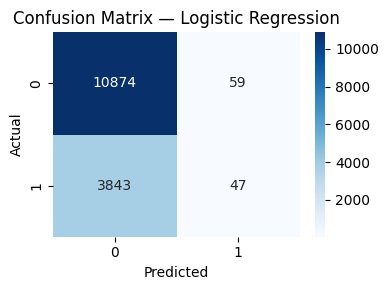

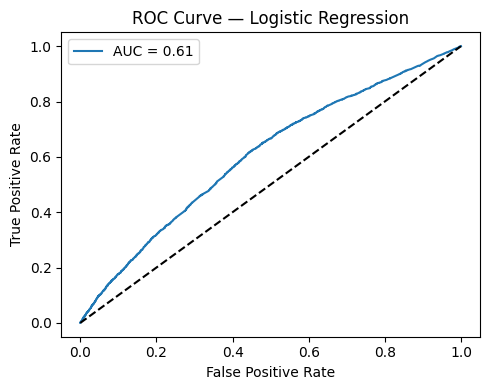

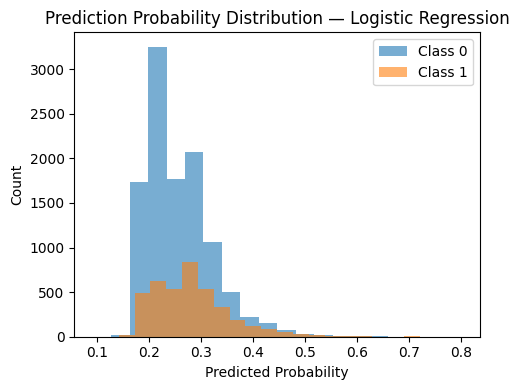

(0.736760439856979, 0.023523523523523524, 0.1095879077911377)

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
evaluate_and_plot(lr, "Logistic Regression", X_train, X_test, y_train, y_test)

AdaBoost

🔹 Модель: AdaBoost
Accuracy: 0.7384
 F1-score: 0.0227
 Время обучения: 1.93 сек

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     10933
           1       0.58      0.01      0.02      3890

    accuracy                           0.74     14823
   macro avg       0.66      0.50      0.44     14823
weighted avg       0.70      0.74      0.63     14823



,Metric,Value
0,Accuracy,0.738380
1,F1-score,0.022681
2,Train time (s),1.934303


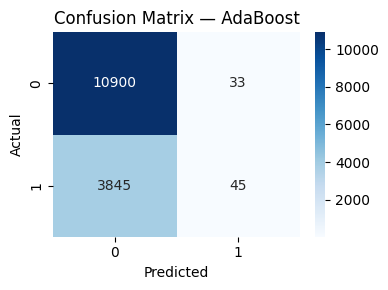

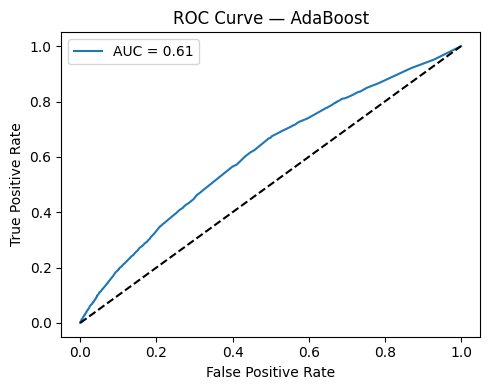

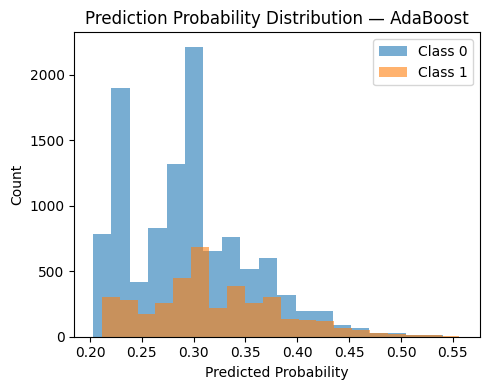

(0.7383795453012211, 0.022681451612903226, 1.9343032836914062)

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
evaluate_and_plot(ada, "AdaBoost", X_train, X_test, y_train, y_test)

MLPClassifier

🔹 Модель: MLPClassifier
Accuracy: 0.7335
 F1-score: 0.1341
 Время обучения: 54.78 сек

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.84     10933
           1       0.45      0.08      0.13      3890

    accuracy                           0.73     14823
   macro avg       0.60      0.52      0.49     14823
weighted avg       0.67      0.73      0.66     14823



,Metric,Value
0,Accuracy,0.733455
1,F1-score,0.134122
2,Train time (s),54.780996


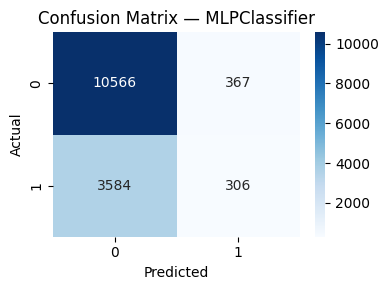

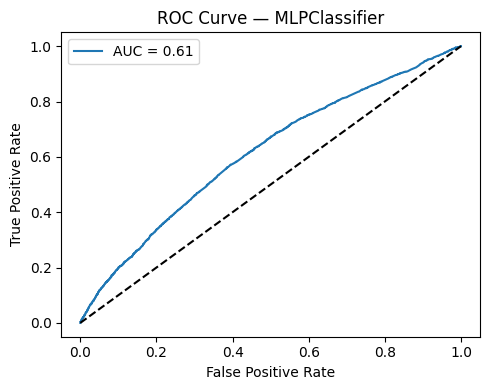

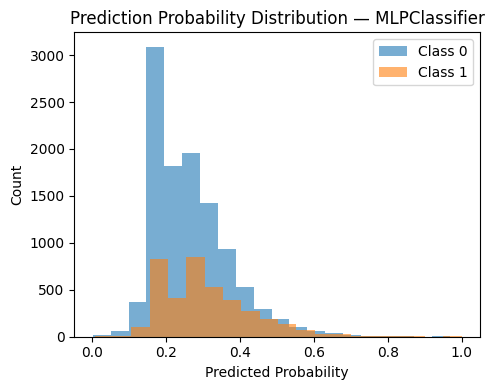

(0.7334547662416515, 0.1341222879684418, 54.780996322631836)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64,32), activation='relu', solver='adam', max_iter=200, random_state=42)
evaluate_and_plot(mlp, "MLPClassifier", X_train, X_test, y_train, y_test)

 XGBoost

🔹 Модель: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:29:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7364
 F1-score: 0.0987
 Время обучения: 2.50 сек

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.85     10933
           1       0.48      0.06      0.10      3890

    accuracy                           0.74     14823
   macro avg       0.61      0.52      0.47     14823
weighted avg       0.68      0.74      0.65     14823



,Metric,Value
0,Accuracy,0.736423
1,F1-score,0.098731
2,Train time (s),2.500628


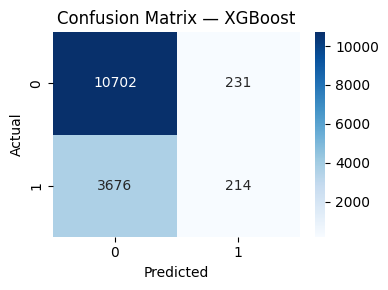

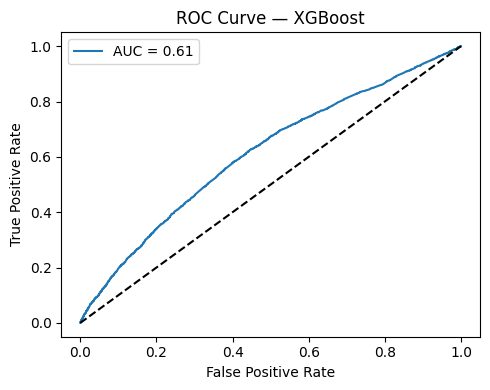

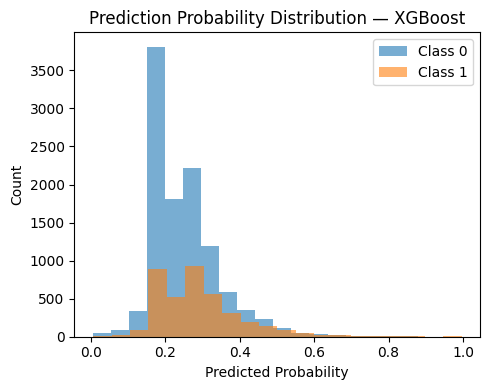

(0.736423126222762, 0.09873125720876585, 2.5006284713745117)

In [ ]:
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
evaluate_and_plot(xgb, "XGBoost", X_train, X_test, y_train, y_test)

Naive Bayes

🔹 Модель: Naive Bayes
Accuracy: 0.7129
 F1-score: 0.1869
 Время обучения: 0.03 сек

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83     10933
           1       0.36      0.13      0.19      3890

    accuracy                           0.71     14823
   macro avg       0.56      0.52      0.51     14823
weighted avg       0.65      0.71      0.66     14823



,Metric,Value
0,Accuracy,0.712879
1,F1-score,0.186855
2,Train time (s),0.028337


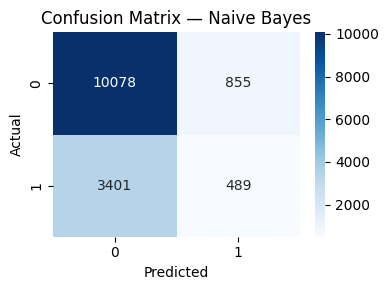

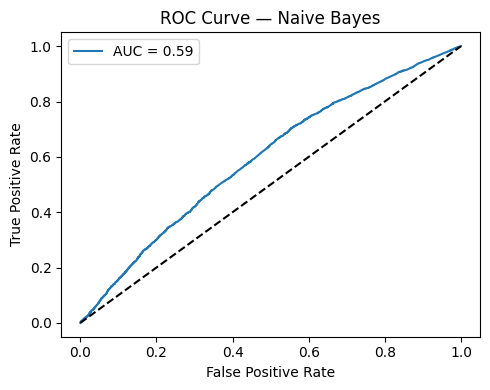

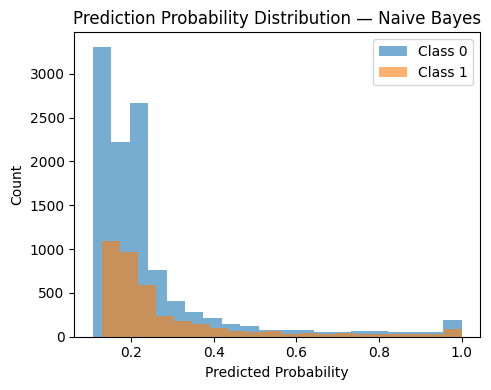

(0.7128786345544087, 0.1868551776843714, 0.02833700180053711)

In [ ]:
nb = GaussianNB()
evaluate_and_plot(nb, "Naive Bayes", X_train, X_test, y_train, y_test)

K-Nearest Neighbors (KNN)

🔹 Модель: KNN
Accuracy: 0.6826
 F1-score: 0.2415
 Время обучения: 0.08 сек

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80     10933
           1       0.32      0.19      0.24      3890

    accuracy                           0.68     14823
   macro avg       0.54      0.52      0.52     14823
weighted avg       0.64      0.68      0.65     14823



,Metric,Value
0,Accuracy,0.682588
1,F1-score,0.241496
2,Train time (s),0.083336


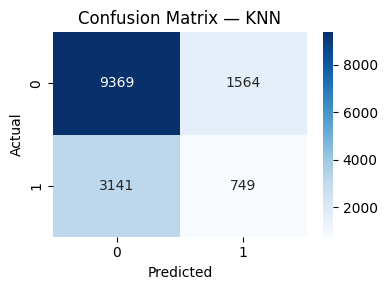

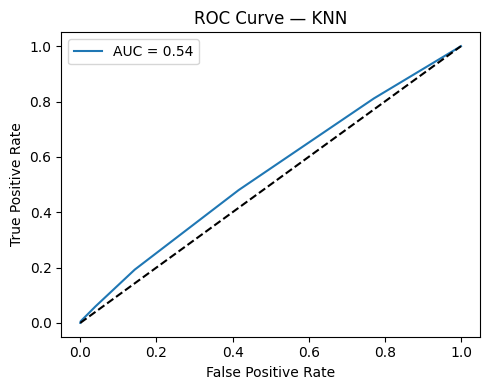

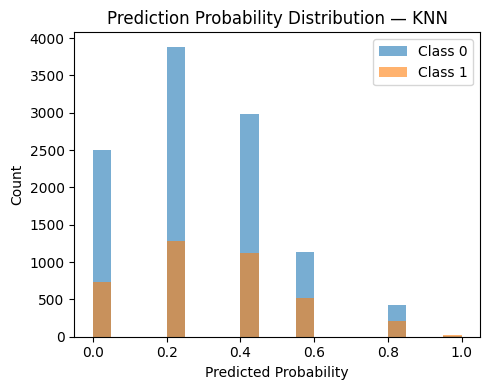

(0.6825878702017135, 0.24149605029824278, 0.08333635330200195)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_and_plot(knn, "KNN", X_train, X_test, y_train, y_test)

# Multti Class Classification


In [ ]:
print(df['room_type'].unique())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['room_type_encoded'] = le.fit_transform(df['room_type'])

features = ['accommodates', 'bathrooms', 'beds', 'number_of_reviews', 'review_scores_rating'] + bool_cols

from sklearn.impute import SimpleImputer
num_cols = ['accommodates', 'bathrooms', 'beds', 'number_of_reviews', 'review_scores_rating']

num_imputer = SimpleImputer(strategy='median')
X_num = num_imputer.fit_transform(df[num_cols])

bool_imputer = SimpleImputer(strategy='constant', fill_value=0)
X_bool = bool_imputer.fit_transform(df[bool_cols])

import numpy as np
X = np.hstack([X_num, X_bool])
y = df['room_type_encoded']



['Entire home/apt' 'Private room' 'Shared room']


Масштабирование

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train/test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Предобработка для мультикласса завершена. Данные готовы к обучению моделей.")


Предобработка для мультикласса завершена. Данные готовы к обучению моделей.


XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_multi = XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), use_label_encoder=False, eval_metric='mlogloss')
xgb_multi.fit(X_train, y_train)
y_pred_xgb = xgb_multi.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy XGBoost:", accuracy_xgb)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:40:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy XGBoost: 0.7487688052351076


MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_multi = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=200, random_state=42)
mlp_multi.fit(X_train, y_train)
y_pred_mlp = mlp_multi.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy MLPClassifier:", accuracy_mlp)


Accuracy MLPClassifier: 0.7474870134250826


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_multi = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
ada_multi.fit(X_train, y_train)
y_pred_ada = ada_multi.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy AdaBoost (SAMME):", accuracy_ada)


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Accuracy AdaBoost (SAMME): 0.7441813398097551


In [ ]:
import time
from sklearn.metrics import accuracy_score
import pandas as pd

results_list = []

start_time = time.time()
xgb_multi = XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)),
                          use_label_encoder=False, eval_metric='mlogloss')
xgb_multi.fit(X_train, y_train)
elapsed = time.time() - start_time

y_pred_xgb = xgb_multi.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

if elapsed < 2:
    speed = 'fast'
elif elapsed < 5:
    speed = 'medium'
else:
    speed = 'slow'

results_list.append({
    'Method': 'XGBoost',
    'Dataset': 'Airbnb',
    'Amount of data': len(X_train) + len(X_test),
    'Speed': speed,
    'Accuracy': round(accuracy_xgb, 4)
})

start_time = time.time()
mlp_multi = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=200, random_state=42)
mlp_multi.fit(X_train, y_train)
elapsed = time.time() - start_time

y_pred_mlp = mlp_multi.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

speed = 'fast' if elapsed < 2 else 'medium' if elapsed < 5 else 'slow'

results_list.append({
    'Method': 'MLPClassifier',
    'Dataset': 'Airbnb',
    'Amount of data': len(X_train) + len(X_test),
    'Speed': speed,
    'Accuracy': round(accuracy_mlp, 4)
})

start_time = time.time()
ada_multi = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
ada_multi.fit(X_train, y_train)
elapsed = time.time() - start_time

y_pred_ada = ada_multi.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

speed = 'fast' if elapsed < 2 else 'medium' if elapsed < 5 else 'slow'

results_list.append({
    'Method': 'AdaBoost SAMME',
    'Dataset': 'Airbnb',
    'Amount of data': len(X_train) + len(X_test),
    'Speed': speed,
    'Accuracy': round(accuracy_ada, 4)
})

results_df = pd.DataFrame(results_list)
results_df


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:41:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


,Method,Dataset,Amount of data,Speed,Accuracy
0,XGBoost,Airbnb,74111,medium,0.7488
1,MLPClassifier,Airbnb,74111,slow,0.7497
2,AdaBoost SAMME,Airbnb,74111,medium,0.7442


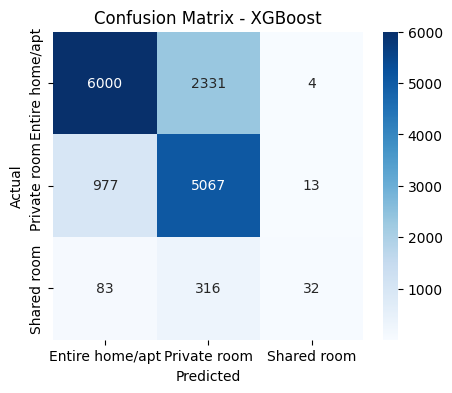

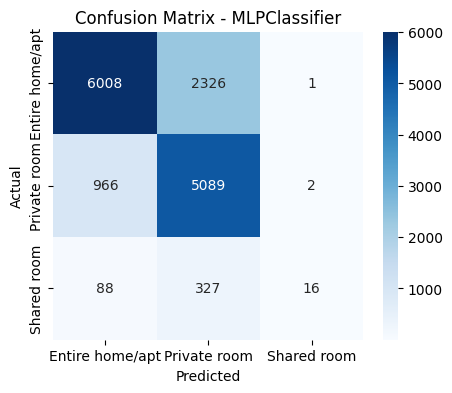

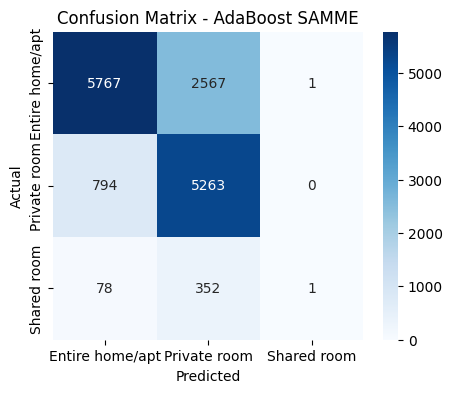

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_multi(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Построение для всех моделей
plot_confusion_multi(y_test, y_pred_xgb, 'XGBoost')
plot_confusion_multi(y_test, y_pred_mlp, 'MLPClassifier')
plot_confusion_multi(y_test, y_pred_ada, 'AdaBoost SAMME')


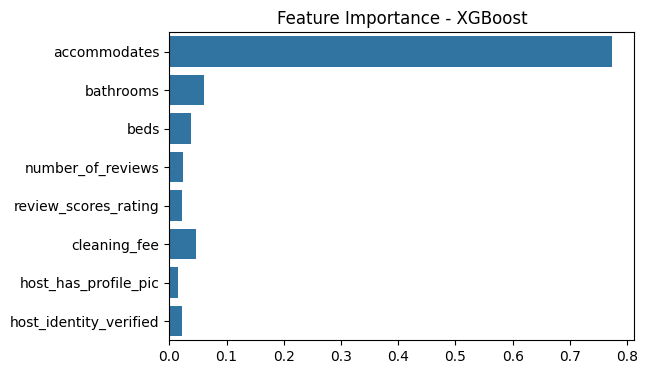

In [ ]:
import numpy as np

xgb_importances = xgb_multi.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=xgb_importances, y=features)
plt.title('Feature Importance - XGBoost')
plt.show()


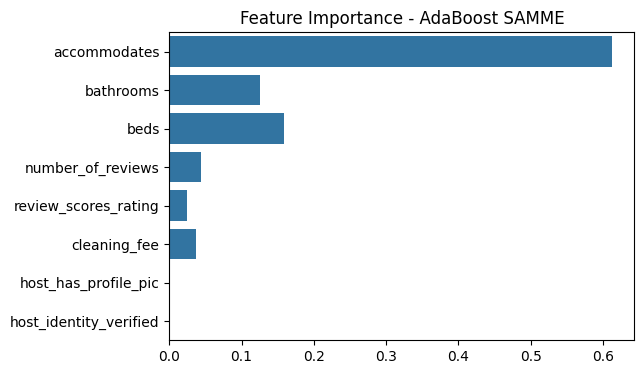

In [ ]:
ada_importances = ada_multi.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=ada_importances, y=features)
plt.title('Feature Importance - AdaBoost SAMME')
plt.show()


 Multiclass Logistic Regression

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


🔹 Multinomial Logistic Regression
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



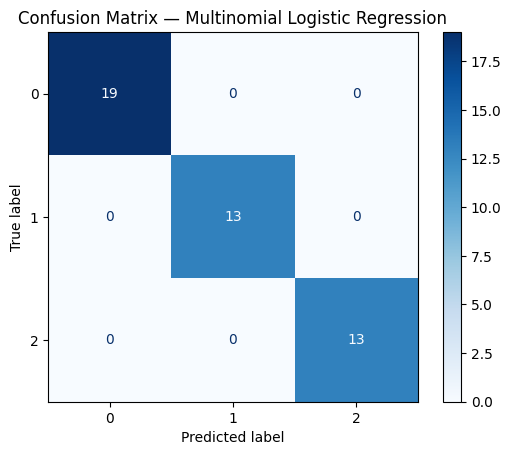

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lr_multi = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
lr_multi.fit(X_train_multi, y_train_multi)
y_pred_lr_multi = lr_multi.predict(X_test_multi)

print("🔹 Multinomial Logistic Regression")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_lr_multi))
print("\nClassification Report:\n", classification_report(y_test_multi, y_pred_lr_multi))

cm = confusion_matrix(y_test_multi, y_pred_lr_multi)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix — Multinomial Logistic Regression")
plt.show()


Naive Bayes (Gaussian)

🔹 Naive Bayes (Gaussian)
Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



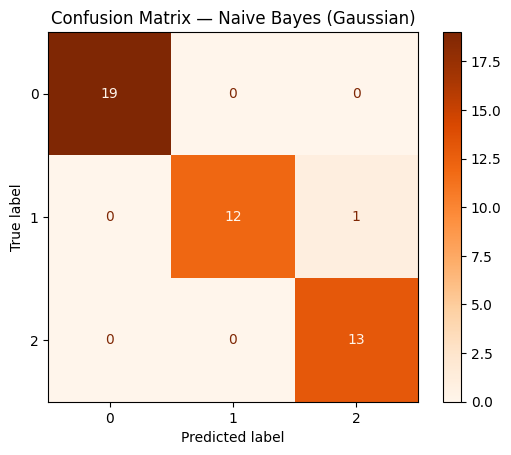

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_gauss = GaussianNB()
nb_gauss.fit(X_train_multi, y_train_multi)
y_pred_nb_gauss = nb_gauss.predict(X_test_multi)

print("🔹 Naive Bayes (Gaussian)")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_nb_gauss))
print("\nClassification Report:\n", classification_report(y_test_multi, y_pred_nb_gauss))

cm = confusion_matrix(y_test_multi, y_pred_nb_gauss)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix — Naive Bayes (Gaussian)")
plt.show()


KNeighborsClassifier

🔹 k-Nearest Neighbors (KNN)
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



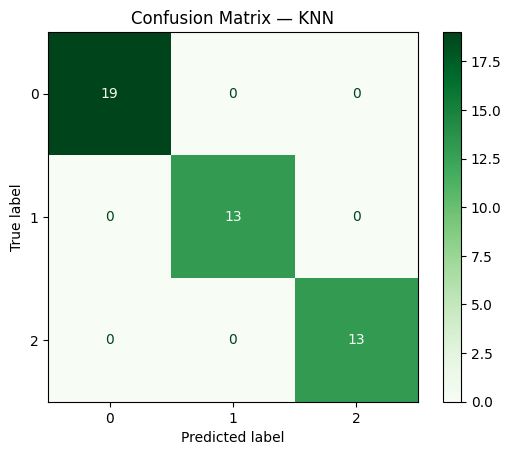

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_multi = KNeighborsClassifier(n_neighbors=5)
knn_multi.fit(X_train_multi, y_train_multi)
y_pred_knn_multi = knn_multi.predict(X_test_multi)

print("🔹 k-Nearest Neighbors (KNN)")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_knn_multi))
print("\nClassification Report:\n", classification_report(y_test_multi, y_pred_knn_multi))

cm = confusion_matrix(y_test_multi, y_pred_knn_multi)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix — KNN")
plt.show()
